> # **MNIST - IMAGE CLASSIFICATION**

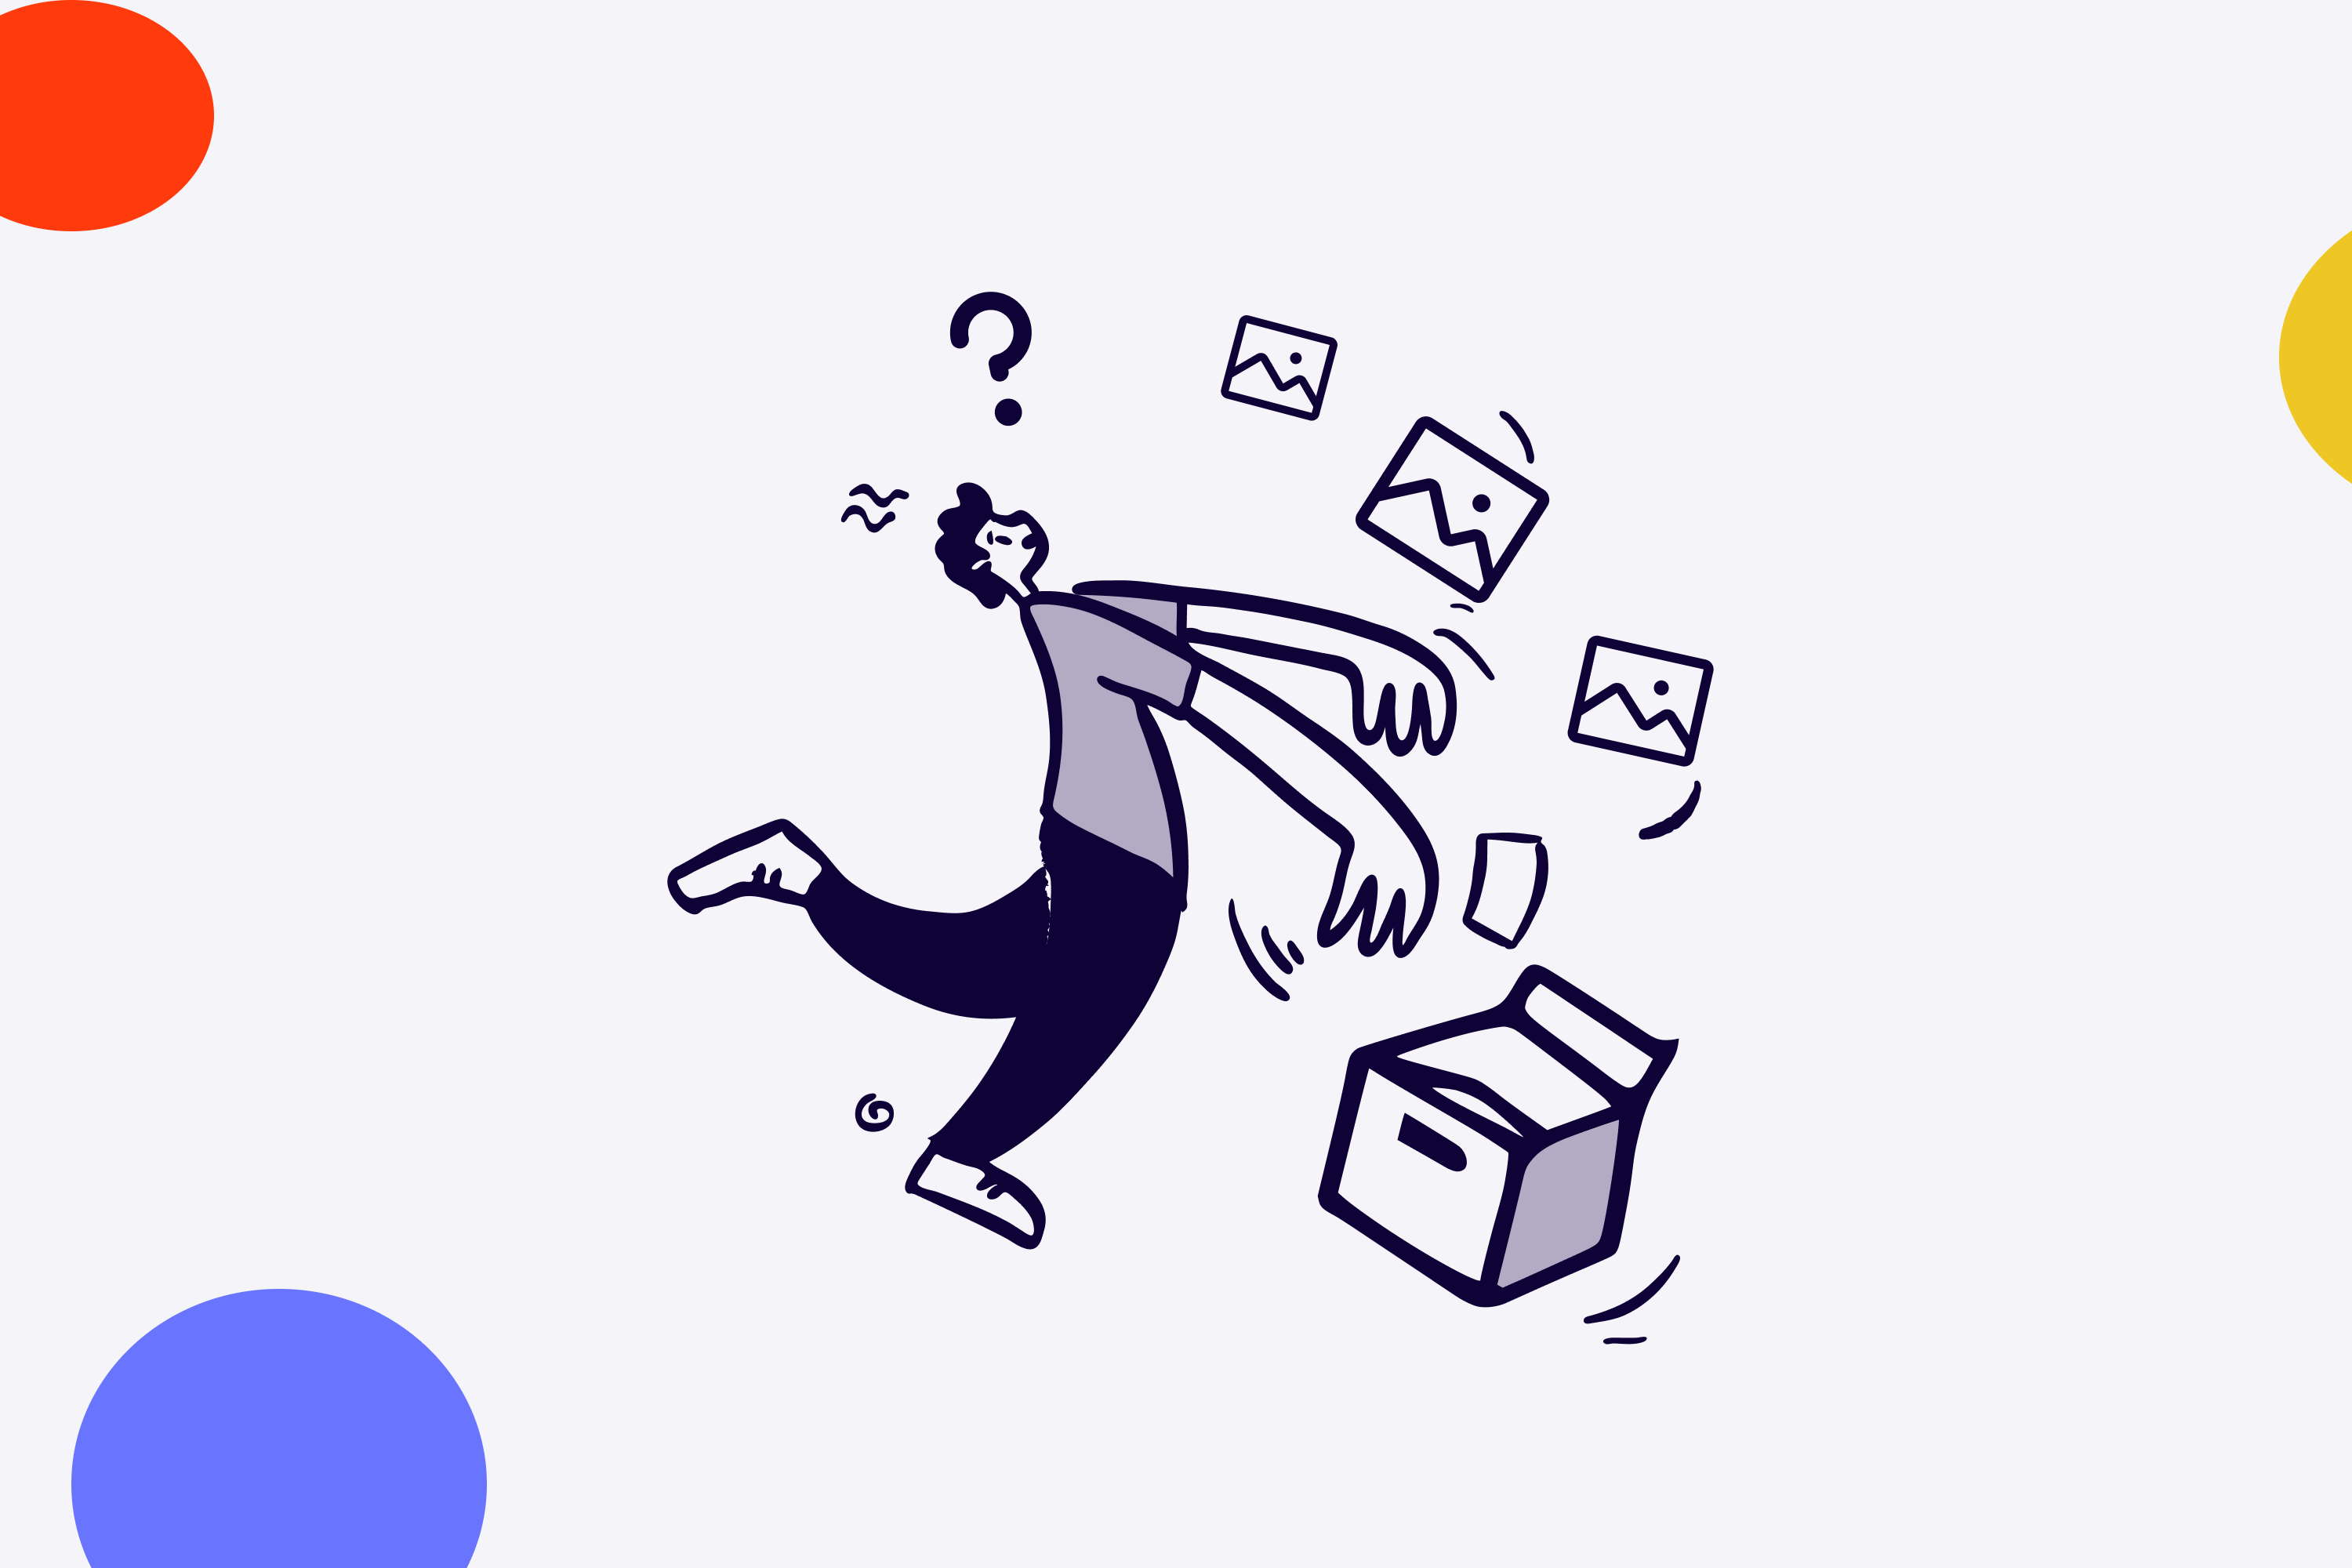

> ### ABOUT MNIST DATASET
> - **Features**: MNIST consists of 70,000 images of handwritten digits. These digits range from 0 to 9.
>
> - **Image Details**: Each image is a grayscale, 28x28 pixel square, which means each image contains 784 pixels (28x28=784), with each pixel value ranging from 0 (black) to 255 (white).
>
> - **Structure**: 60,000 images, used to train machine learning models. 10,000 images, used to evaluate the performance of the models.
>
> - **Labeling**: Each image is labeled with the corresponding digit it represents, making it a supervised learning dataset where the goal is to train a model to correctly classify these handwritten digits.

<hr>

> ### IMPORTING REQUIRED LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

> # **DATASET OVERVIEW AND VISULIZATION**

In [2]:
mnist = pd.read_csv('data.csv')
mnist.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


> ### REPRESENTATION OF DIGIT

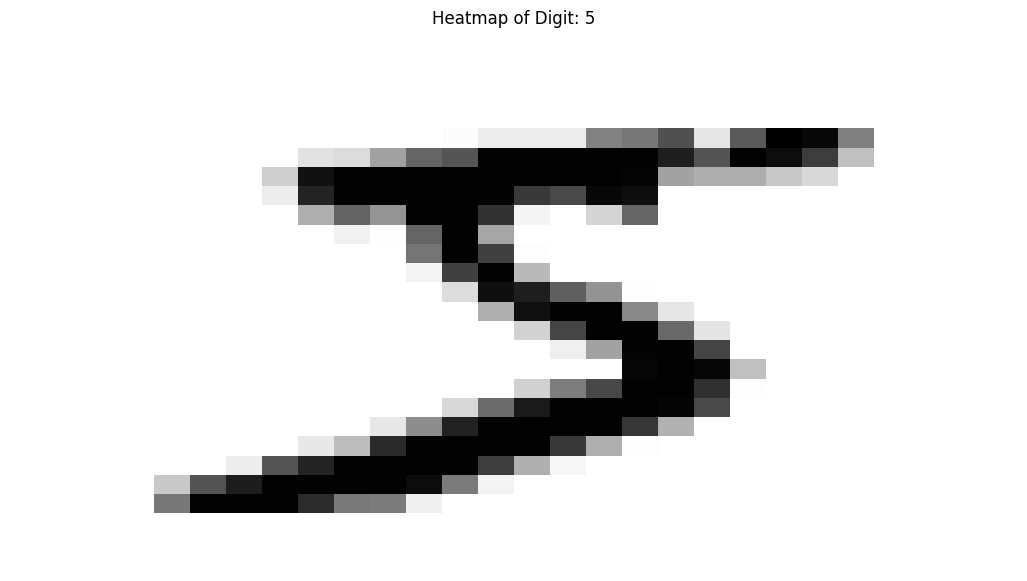

In [3]:
import seaborn as sns

digit = np.array(mnist.iloc[:1, :784]).reshape(28, 28)
plt.figure(figsize=(13, 7))
sns.heatmap(digit, cmap='binary', cbar=None)
plt.title(f"Heatmap of Digit: {mnist.iloc[:1, -1:].values[0, 0]}")
plt.axis(False)
plt.show()

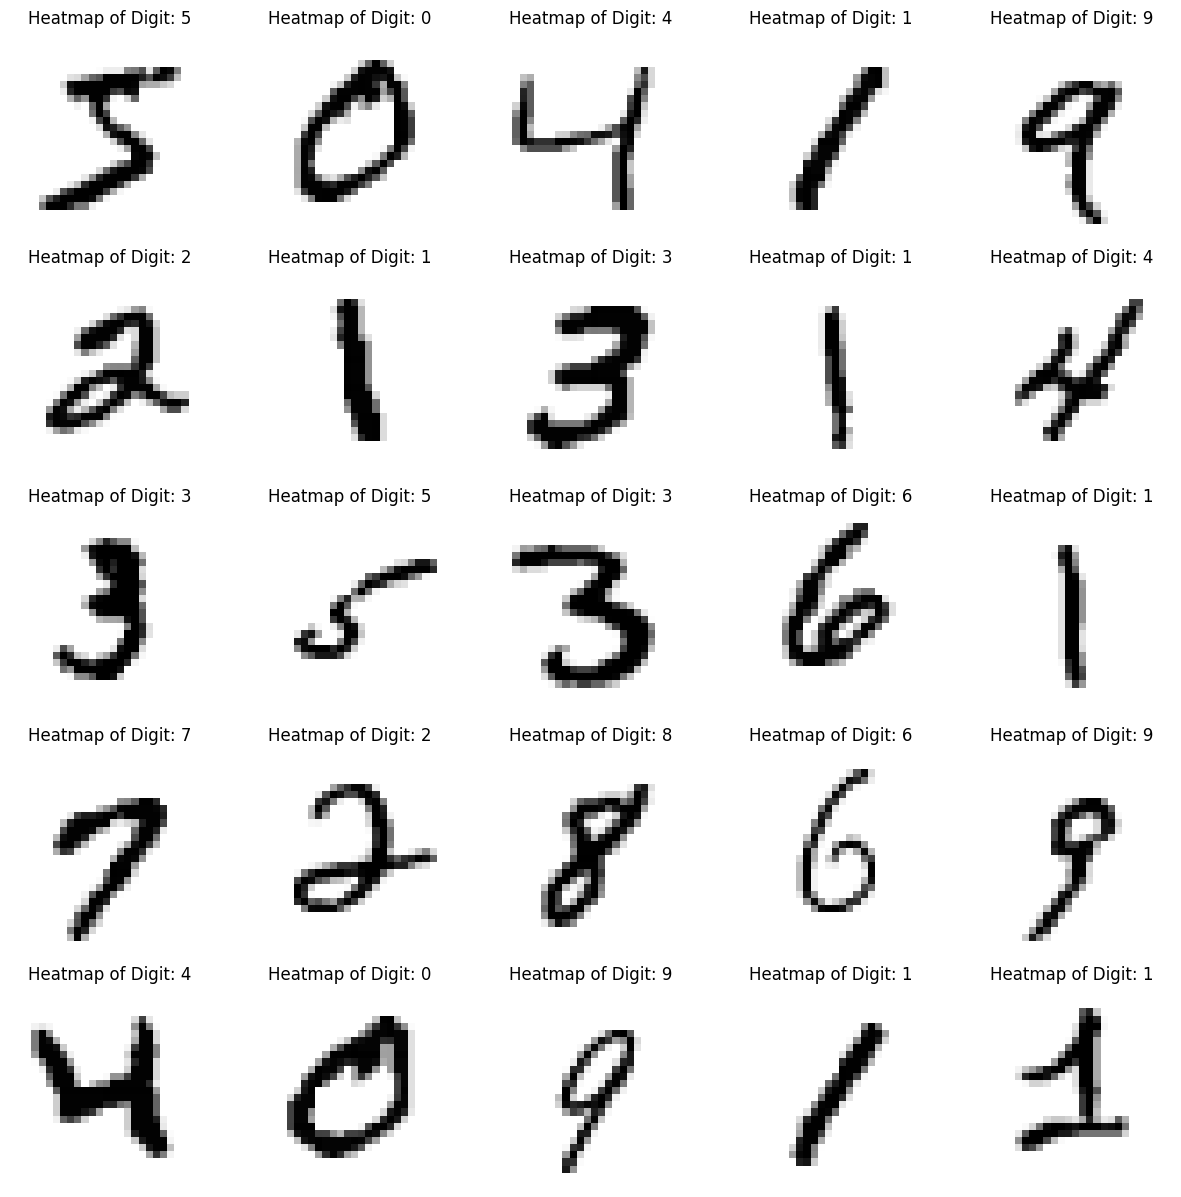

In [4]:
fig, ax = plt.subplots(nrows = 5, ncols = 5)
fig.set_figheight(15)
fig.set_figwidth(15)

idx = 0

for i in range(5):
    for j in range(5):
        digit = np.array(mnist.iloc[idx:1 + idx, :784]).reshape(28, 28)
        ax[i, j].imshow(digit, cmap='binary')
        ax[i, j].axis("off")
        ax[i, j].set_title(f"Heatmap of Digit: {mnist.iloc[idx:idx + 1, -1:].values[0, 0]}")
        idx += 1

plt.show()

In [5]:
mnist['class'].value_counts()

class
1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: count, dtype: int64

<hr>

> # **DATA SAMPLING - `StratifiedShuffleSplit`**

In [7]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=10)

for train_idx, test_idx in split.split(X=mnist, y=mnist['class']):
    train_set = mnist.iloc[train_idx]
    test_set = mnist.iloc[test_idx]

In [9]:
X_train = train_set.drop('class', axis=1)
y_train = train_set['class']

X_test = test_set.drop('class', axis=1)
y_test = test_set['class']

In [14]:
y_train.value_counts().sort_index()

class
0    6213
1    7089
2    6291
3    6427
4    6142
5    5682
6    6188
7    6564
8    6142
9    6262
Name: count, dtype: int64

In [13]:
y_test.value_counts().sort_index()

class
0    690
1    788
2    699
3    714
4    682
5    631
6    688
7    729
8    683
9    696
Name: count, dtype: int64

<hr>

> # **TRAINING A BINARY CLASSIFIER**

>Let’s simplify the problem for now and only try to identify one digit—for example,
the number 5. This “5-detector” will be an example of a binary classifier, capable of
distinguishing between just two classes, 5 and not-5. Let’s create the target vectors for
this classification task

In [15]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

> ### MODEL TRAINING - `SGDClassifier`

In [16]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)
y_pred = sgd_clf.predict(X_test)

> ### CROSS VALIDATION

In [19]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    sgd_clf,
    X = X_train,
    y = y_train_5,
    cv = 3,
    scoring = 'accuracy'
)

print(scores)

[0.96342857 0.94214286 0.95838095]


> ### MODEL TRAINING - `DummyClassifier`

In [20]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(random_state = 42)
dummy_clf.fit(X_train, y_train_5)
y_pred = dummy_clf.predict(X_test)

In [21]:
score = cross_val_score(
    dummy_clf,
    X = X_train,
    y = y_train_5,
    cv = 5,
    scoring = 'accuracy'
)

print(score)

[0.90984127 0.90984127 0.90984127 0.9097619  0.9097619 ]


In [25]:
print(y_test_5[y_test_5 == False].shape)
print(y_test_5[y_test_5 == True].shape)

print(y_pred[y_pred == False].shape)
print(y_pred[y_pred == True].shape)

# This is also calculated using Confusion Matrix

(6369,)
(631,)
(7000,)
(0,)


> The reason behind `Accuracy Score > 0.9` - This is simply because only about 10% of the
images are 5s, so if you always guess that an image is not a 5, you will be right about
90% of the time. - `Class Imbanance`

> This demonstrates why `accuracy` is generally not the preferred `performance measure`
for `classifiers`, especially when you are dealing with `skewed datasets` (i.e., when some
classes are much more frequent than others).

> ### MODEL PREDICTION - `cross_val_predict`

> This function performs `K-foldcross-validation`, but instead of returning the evaluation scores, it returns the predictions made on each test fold. This means that you get a clean prediction for each
instance in the training set

In [26]:
from sklearn.model_selection import cross_val_predict

y_pred_cv = cross_val_predict(
    sgd_clf,
    X = X_train,
    y = y_train_5,
    cv = 3
)

y_pred_cv

array([False, False, False, ..., False, False, False])

> ### CONFUSION MATRIX

In [27]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_pred_cv)
# Each row in a confusion matrix represents an actual class, while each column represents a predicted class

array([[55326,  1992],
       [  865,  4817]], dtype=int64)

> ### PRECISION - RECALL - F1 SCORE

In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('precision_score :', precision_score(y_train_5, y_pred_cv))
print('recall_score :', recall_score(y_train_5, y_pred_cv))
print('f1_score :', f1_score(y_train_5, y_pred_cv))

precision_score : 0.7074460273167866
recall_score : 0.8477648715241112
f1_score : 0.771275318229125


> Generally, Those models will be selectd which having both `Precision` and `Recall` to be `High`. It means `High F1-Score`.